**Coursebook: Classification in Machine Learning**

- Bagian 5 Audit Analytics untuk Bank Rakyat Indonesia
- Durasi: 7 Jam
- *Last Updated*: December 2023

___


- *Coursebook* ini disusun dan dikurasi oleh tim produk dan instruktur dari [Algoritma Data Science School](https://algorit.ma/)

# Background

*Coursebook* ini merupakan bagian dari **BRI Audit Analytics** yang disiapkan oleh [Algoritma](https://algorit.ma). *Coursebook* ini ditujukan hanya untuk khalayak terbatas, yaitu individu dan organisasi yang menerima *coursebook* ini langsung dari organisasi pelatihan. Tidak boleh direproduksi, didistribusikan, diterjemahkan, atau diadaptasi dalam bentuk apapun di luar individu dan organisasi ini tanpa izin.
Algoritma adalah pusat pendidikan *data science* yang berbasis di Jakarta. Kami menyelenggarakan *workshop* dan program pelatihan untuk membantu para profesional dan mahasiswa dalam menguasai berbagai sub-bidang *data science* yaitu: *data visualization, machine learning,* statistik, dan lain sebagainya.

# Classification in Machine Learning

## Training Objectives

Pada _workshop_ ini, Anda akan mempelajari salah satu _case_ yang cukup umum diselesaikan dengan _machine_ _learning_, yaitu klasifikasi. Klasifikasi merupakan aplikasi dari _supervised_ _learning_ (cabang dari _machine_ _learning_), dengan model diharapkan dapat memberikan _output_ berdasarkan kategori yang sudah ditentukan. Misalnya:

* Mengidentifikasi apakah suatu _email_ merupakan _spam_ atau tidak.
* Mengidentifikasi apakah pelanggan akan membeli suatu produk atau tidak.
* Mengidentifikasi objek buah-buahan pada suatu gambar, apakah objek tersebut merupakan apel, pisang, atau mangga.

Anda akan mempelajari siklus proses dalam membangun model _machine_ _learning_ untuk klasifikasi dan konsep matematika di belakangnya. _Workshop_ ini akan berfokus pada 3 model _machine_ _learning_: _logistic_ _regression_, _decision_ _tree_, dan _random_ _torest_. Dengan durasi selama 7 jam, pembelajaran pada _workshop_ ini terbagi dalam beberapa modul:

* ***Data Preprocessing***
    + _Target and Predictors Splitting_
    + _Dummy Variables for Categorical Predictor_
    + _Cross Validation_
* ***Classification Concepts for Logistic Regression***
    + _Probability concept_
    + _Understanding log of odds_
    + _Understanding logit function_
* ***Logistic Regression Implementation***
    + _Logistic regression with discrete predictor variables_
    + _Logistic regression with one continuous predictor variables_
    + _Logistic regression with multiple predictors variable_
    + _Assumption of logistic regression_
* ***Performance Evaluation and Model Selection***
    + _Confusion Matrix_
        + _Accuracy_
        + _Sensitivity_
        + _Recall_
        + _Specificity_
* ***K - Nearest Neighbors*** 
    + _Euclidean distance_
    + _Choosing an appropriate K_
    + _Features rescaling_
        + _Min-max normalization_
        + _Z-score standardization_
    + _Characteristics of K-NN_


In [2]:
# Package 
'''
Package dapat dibayangkan sebagai sekumpulan program yang telah ditulis seseorang sehingga 
dapat digunakan oleh orang lain yang ingin menyelesaikan permasalahan yang serupa.
''' 

import warnings

# package untuk perhitungan matematika
import math
import numpy as np

# package untuk persiapan data
import pandas as pd

# package untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# package untuk keperluan modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# pandas display setup
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# suppress scientific notation
np.set_printoptions(suppress=True) # numpy output
pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas output

# suppress warning
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparation and Exploratory Data

Di dunia nyata, sering kali terdapat permasalahan pada data mentah yang dapat mengganggu proses analisis, seperti kesalahan _input_, nilai yang hilang, atau format penulisan yang tidak konsisten. Untuk mengatasi permasalahan tersebut, dilakukan preparasi data. 

> Preparasi data merupakan serangkaian proses mengubah data mentah menjadi format yang lebih siap dan sesuai untuk analisis lebih lanjut. Preparasi data merupakan proses yang penting dan harus dilakukan sebelum analisis dan pembuatan model _machine learning_. 

Berikut beberapa _step_ yang sering dilakukan pada tahap preparasi data:

1. Cek tipe data setiap kolom.
2. Cek data yang hilang/_missing values_.
3. _Feature selection_.

## Read The Dataset

Pada _step_ ini, kita akan memuat data mentah yang akan digunakan sepanjang proses analisis dan pembuatan model _machine_ _learning_. _Package_ `pandas` menyediakan banyak fungsi yang dapat kita manfaatkan untuk membaca data, tergantung format data yang kita miliki. 

* Format `.xlsx` menggunakan `pd.read_excel()`.
* Format `.csv` menggunakan `pd.read_csv()`.
* Format data lainnya yang dapat dilihat [di sini](https://pandas.pydata.org/docs/reference/io.html).

> **_Note_**: Selama proses persiapan dan pemrosesan data, kita akan banyak menggunakan fungsi yang terdapat pada _package_ `pandas`.

Kita akan menggunakan _dataset_ `credit100.csv`. Data ini merupakan data akun bank dari research paper metode evaluasi machine learning [berikut ini](https://arxiv.org/pdf/2211.13358.pdf). Secara detailnya data ini bisa dilihat lebih lanjut pada [link GitHub ini](https://github.com/feedzai/bank-account-fraud).

Karena _dataset_ ini memiliki format `.csv`, kita akan menggunakan fungsi `pd.read_csv()`.


In [4]:
credit = pd.read_csv("data_input/credit100.csv")
credit = credit.drop(columns=["device_fraud_count"])

# menampilkan 5 baris teratas
credit.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.90000,0.61579,-1,51,40,0.01034,-0.69955,AB,2659,11007.70883,7448.79742,5576.30356,2030,7,CA,253,1,BA,1,1,9,1,1500.00000,0,INTERNET,13.07981,linux,0,1,1
1,0,0.60000,0.07246,-1,125,20,0.00697,-0.95947,AC,5599,6304.26284,4373.09359,4721.10002,1,13,CA,112,1,BE,1,0,-1,0,200.00000,0,INTERNET,6.66655,windows,0,1,4
2,1,0.50000,0.07659,-1,37,50,0.00632,-1.21993,AB,1352,1357.41355,6667.02966,6318.87626,15,6,CF,199,1,BC,1,1,28,0,1500.00000,0,INTERNET,4.49267,windows,1,2,0
3,0,0.30000,0.25543,23,19,20,0.00927,3.24224,AA,3743,5234.26230,6139.48958,4201.72592,1,14,CA,63,1,BC,0,1,16,0,200.00000,0,INTERNET,2.32189,other,1,1,3
4,0,0.90000,0.19236,-1,34,30,0.01924,-1.13156,AB,546,3589.15345,4574.39557,4318.25891,16,5,CA,275,1,BC,1,1,1,1,1000.00000,0,INTERNET,4.84515,linux,1,1,5


**Penjelasan Dataset**

Berikut adalah penjelasan setiap kolom yang terdapat pada _dataset_:

- `income` (numeric): _Annual income of the applicant (in decile form). Ranges between [0.1, 0.9]._
- `name_email_similarity` (numeric): _Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1]._
- `prev_address_months_count` (numeric): _Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value)._
- `current_address_months_count` (numeric): _Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value)._
- `customer_age` (numeric): _Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years._
- `days_since_request` (numeric): _Number of days passed since application was done. Ranges between [0, 79] days._
- `intended_balcon_amount` (numeric): _Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values)._
- `payment_type` (categorical): _Credit payment plan type. 5 possible (annonymized) values._
- `zip_count_4w` (numeric): _Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830]._
- `velocity_6h` (numeric): _Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818]._
- `velocity_24h` (numeric): _Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586]_
- `velocity_4w` (numeric): _Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020]._
- `bank_branch_count_8w` (numeric): _Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404]._
- `date_of_birth_distinct_emails_4w` (numeric): _Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39]._
- `employment_status` (categorical): _Employment status of the applicant. 7 possible (annonymized) values._
- `credit_risk_score` (numeric): _Internal score of application risk. Ranges between [−191, 389]._
- `email_is_free` (binary): _Domain of application email (either free or paid)._
- `housing_status` (categorical): _Current residential status for applicant. 7 possible (annonymized) values._
- `phone_home_valid` (binary): _Validity of provided home phone._
- `phone_mobile_valid` (binary): _Validity of provided mobile phone._
- `bank_months_count` (numeric): _How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value)._
- `has_other_cards` (binary): _If applicant has other cards from the same banking company. _
- `proposed_credit_limit` (numeric): _Applicant’s proposed credit limit. Ranges between [200, 2000]._
- `foreign_request` (binary): _If origin country of request is different from bank’s country._
- `source` (categorical): _Online source of application. Either browser (INTERNET) or app (TELEAPP)._
- `session_length_in_minutes` (numeric): _Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value)._
- `device_os` (categorical): _Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other._
- `keep_alive_session` (binary): _User option on session logout._
- `device_distinct_emails` (numeric): _Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value)._
- `device_fraud_count` (numeric): _Number of fraudulent applications with used device. Ranges between [0, 1]._
- `month` (numeric): _Month where the application was made. Ranges between [0, 7]._
- `fraud_bool` (binary): _If the application is fraudulent or not._

## Descriptive Statistics

Pemeriksaan statistik deskriptif merupakan analisis awal yang dilakukan untuk mendapatkan pemahaman tentang sifat dasar dari _dataset_. Seperti namanya, statistik deskriptif mencakup penghitungan ringkasan statistik yang menggambarkan ciri-ciri kumpulan data tersebut, seperti: ukuran pemusatan data (_mean_ dan median) dan ukuran penyebaran data (standar deviasi). 

Meskipun perhitungan yang ditampilkan cukup sederhana, statistik deskriptif bisa menjadi alternatif _tools_ yang cukup _powerful_. Sebagai contoh, kita dapat mengetahui kecenderungan persebaran data dan melakukan deteksi awal apakah terdapat nilai pencilan (_outlier_) yang berbeda jauh dibandingkan nilai-nilai lainnya.

Untuk menampilkan statistik deskriptif pada data `credit`, kita dapat menggunakan fungsi `.describe()`.

In [5]:
credit.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000
mean,0.11029,0.57243,0.48334,15.67167,89.09414,34.34520,1.02909,8.05770,1579.65136,5622.74948,4751.70038,4846.51788,178.94636,9.31030,135.47810,0.54335,0.39658,0.88576,10.76559,0.20875,545.64380,0.02764,7.64760,0.55407,1.02486,3.30663
std,0.31325,0.29097,0.29139,43.04344,88.27788,12.31084,5.39503,19.80150,1003.51929,3006.95237,1476.12014,926.53103,455.26869,5.05074,72.37795,0.49812,0.48919,0.31810,12.18756,0.40642,513.04025,0.16394,8.28959,0.49707,0.20006,2.22212
min,0.00000,0.10000,0.00006,-1.00000,-1.00000,10.00000,0.00000,-14.06498,1.00000,8.67828,1320.28399,2863.78334,0.00000,0.00000,-170.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,190.00000,0.00000,-1.00000,0.00000,-1.00000,0.00000
25%,0.00000,0.30000,0.21060,-1.00000,22.00000,20.00000,0.00706,-1.18451,899.00000,3388.04839,3578.88819,4260.40529,1.00000,5.00000,85.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,200.00000,0.00000,3.11938,0.00000,1.00000,1.00000
50%,0.00000,0.60000,0.47765,-1.00000,56.00000,30.00000,0.01492,-0.83992,1272.00000,5272.14754,4734.07444,4904.60572,9.00000,9.00000,126.00000,1.00000,0.00000,1.00000,5.00000,0.00000,200.00000,0.00000,5.09977,1.00000,1.00000,3.00000
75%,0.00000,0.80000,0.74887,11.00000,133.00000,40.00000,0.02607,-0.19746,1963.00000,7644.29673,5733.29879,5483.66273,23.00000,13.00000,185.00000,1.00000,1.00000,1.00000,25.00000,0.00000,1000.00000,0.00000,8.87309,1.00000,1.00000,5.00000
max,1.00000,0.90000,1.00000,365.00000,424.00000,90.00000,76.57727,112.25311,6521.00000,16665.35953,9506.89660,6994.76420,2322.00000,37.00000,378.00000,1.00000,1.00000,1.00000,32.00000,1.00000,2100.00000,1.00000,82.00473,1.00000,2.00000,7.00000


`.describe()` akan mengeluarkan perhitungan:

1. Banyaknya baris pada setiap kolom (`count`).
2. Rata-rata setiap kolom (`mean`).
3. Standar deviasi setiap kolom (`std`).
4. Nilai minimum (`min`) dan maksimum (`max`) setiap kolom.
5. Kuartil bawah (`25%`), median (`50%`), dan kuartil atas (`75%`) setiap kolom.

## Data Types Inspection and Preparation

Pemeriksaan tipe data adalah proses memverifikasi jenis data dalam setiap kolom dari _dataset_ untuk memastikan bahwa setiap kolom sesuai dengan jenis data yang diharapkan. Misalnya, kolom yang berisi tanggal harus diidentifikasi sebagai tipe data tanggal/waktu, sementara kolom yang berisi teks harus diidentifikasi sebagai _string_, dan kolom dengan angka harus diidentifikasi sebagai bilangan bulat (_integer_) atau bilangan berkoma _(floating point_) tergantung pada kebutuhan analisis. 

Untuk memeriksa tipe setiap kolom, kita bisa menggunakan `.dtypes`.

In [6]:
credit.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

Beberapa kolom yang bertipe kategorikal berdasarkan deskripsi data sebelumnya perlu kita ubah terlebih dahulu. Pengubahan tipe data ini menggunakan fungsi `.astype()`. Detail lebih lanjut terkait fungsi `.astype()`, Anda dapat mengunjungi [referensi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

In [7]:
# mengubah tipe data sebagai kategorikal

cat_cols = ['payment_type','employment_status','housing_status','source','device_os']

credit[cat_cols] = credit[cat_cols].astype('category')

In [8]:
# cek tipe data setelah diubah

credit.dtypes

fraud_bool                             int64
income                               float64
name_email_similarity                float64
prev_address_months_count              int64
current_address_months_count           int64
customer_age                           int64
days_since_request                   float64
intended_balcon_amount               float64
payment_type                        category
zip_count_4w                           int64
velocity_6h                          float64
velocity_24h                         float64
velocity_4w                          float64
bank_branch_count_8w                   int64
date_of_birth_distinct_emails_4w       int64
employment_status                   category
credit_risk_score                      int64
email_is_free                          int64
housing_status                      category
phone_home_valid                       int64
phone_mobile_valid                     int64
bank_months_count                      int64
has_other_

> **_Note_**: perlu diingat kembali bahwa terdapat dua tipe data: numerikal dan kategorikal. Khusus kolom kategorik, terdapat pemrosesan tambahan yang akan dibahas lebih lanjut pada bagian _Data Preprocessing_.

## Check Missing Values

Pemeriksaan nilai _null_/_missing_ _value_ adalah proses untuk mendeteksi keberadaan nilai _null_ dalam sebuah _dataset_. Nilai _null_ adalah entri yang tidak memiliki data di dalamnya. Hal ini bisa berarti bahwa informasi tersebut tidak diketahui, tidak ada, atau tidak berlaku. Dalam konteks pemrograman dan analisis data, nilai _null_ ini sering kali diwakili dengan nilai khusus seperti `NULL`, `None`, `NaN` (_Not a Number_).

Untuk melihat apakah terdapat nilai _null_ pada data, kita dapat menggunakan sintaks berikut.

In [9]:
credit.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

Fungsi `.isna().sum()` digunakan untuk melihat banyaknya nilai _null_ di setiap kolom. Terlihat pada _output_ yang ditampilkan bahwa data kita tidak memiliki nilai _null_ sehingga tidak perlu dilakukan _handling missing values_.

**[_Optional_]** Selain menggunakan `.dtypes()` untuk memeriksa tipe data dan `.isna().sum()` untuk melihat banyak _missing_ _values_, kita dapat menggunakan `.info()` untuk menampilkan _summary_ yang lebih lengkap.

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   fraud_bool                        100000 non-null  int64   
 1   income                            100000 non-null  float64 
 2   name_email_similarity             100000 non-null  float64 
 3   prev_address_months_count         100000 non-null  int64   
 4   current_address_months_count      100000 non-null  int64   
 5   customer_age                      100000 non-null  int64   
 6   days_since_request                100000 non-null  float64 
 7   intended_balcon_amount            100000 non-null  float64 
 8   payment_type                      100000 non-null  category
 9   zip_count_4w                      100000 non-null  int64   
 10  velocity_6h                       100000 non-null  float64 
 11  velocity_24h                      100000

Fungsi `.info()` mengeluarkan _output_:

* Banyak baris pada _dataset_: data `credit` terdiri dari 100000 baris.
* Banyak kolom pada _dataset_: data `credit` terdiri dari 31 kolom.
* Nama setiap kolom dan tipe datanya.
* Banyaknya observasi yang tidak _null_. Kita dapat mengidentifikasi kolom dengan nilai _null_ dari output ini. Data `credit` tidak memiliki _missing values_.

## Feature Selection

_Feature selection_ atau seleksi fitur merupakan proses pemilihan _subset_ fitur (variabel atau atribut) yang paling relevan untuk pembuatan model _machine_ _learning_. _Feature selection_ bertujuan untuk memilih fitur-fitur yang paling sesuai dan mengabaikan fitur-fitur yang tidak relevan atau redundan. 

Secara umum, terdapat 2 langkah untuk melakukan _feature selection_:

**1. _Feature selection_ berdasarkan intuisi bisnis** 

Artinya, kita memasukkan fitur/variabel/atribut yang menurut pandangan bisnis berpengaruh kuat dalam melakukan prediksi. Langkah ini dapat dilakukan apabila terdapat _domain knowledge_, pandangan ahli, atau kesepakatan yang dapat dijustifikasi kebenarannya.

**2. Feature selection berdasarkan perhitungan matematika/statistika**

Artinya, pemilihan fitur/variabel/atribut yang akan digunakan untuk membuat _machine_ _learning_ didasarkan pada perhitungan matematis. Sebagai contoh, _feature_ _selection_ yang berpedoman pada perhitungan korelasi setiap kolom.

Sekarang, kita akan berfokus kepada kolom-kolom numerikal data kita. Kita akan membuat sebuah _heatmap_ yang menunjukkan korelasi antarkolom numerikal.

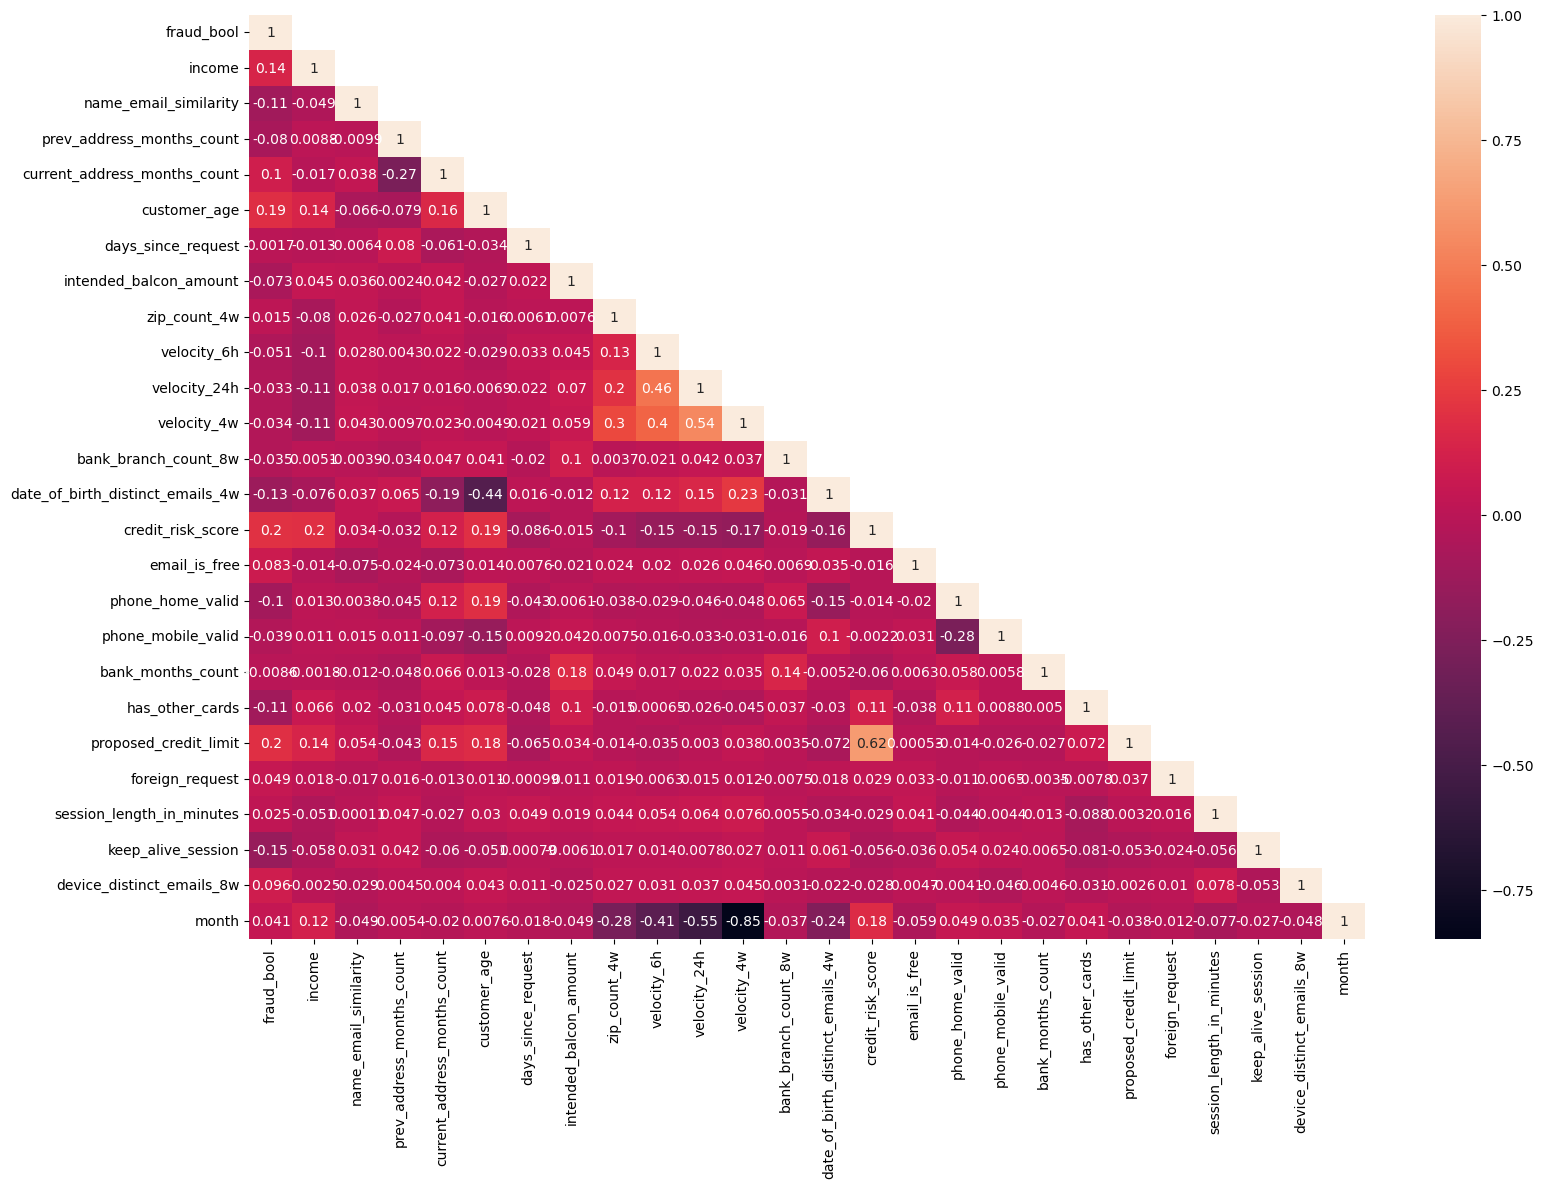

In [11]:
# cek korelasi 

corr = credit.select_dtypes("number").corr()
matrix = np.triu(corr, k=1)

plt.figure(figsize = (18,12));
sns.heatmap(corr, annot=True, mask=matrix);

Berdasarkan gambar di atas, terlihat bahwa sebagian besar variabel memiliki korelasi yang rendah dengan variabel lainnya. Korelasi yang cukup kuat (sebesar -0.85) terdapat antara `month` dan `velocity_24h`. Idealnya, kita mengharapkan antarkolom numerikal di atas memiliki korelasi yang rendah. 

> Perlu diperhatikan bahwa beberapa model mengasumsikan antarprediktor tidak saling berkorelasi tinggi, seperti _logistic regression_. Akan tetapi, model yang cukup _robust_, seperti _decision_ _tree_ dan _random_ _forest_ tidak memiliki aturan yang berhubungan dengan korelasi. 

> _Feature_ _selection_ berdasarkan korelasi hanya merupakan salah satu alternatif dalam melakukan _feature_ _selection_. Metode _feature_ _selection_ lainnya dapat dilihat pada [referensi berikut](https://scikit-learn.org/stable/modules/feature_selection.html).

# Data Preprocessing

Pada dasarnya, _data_ _preprocessing_ tidak berbeda jauh dengan _data_ _preparation_. Keduanya sering digunakan secara bergantian dan sama-sama mengacu kepada serangkaian proses yang dilakukan untuk menghasilkan data dalam format yang siap digunakan untuk proses analisis lanjutan. Akan tetapi, biasanya _data_ _preparation_ memiliki cakupan yang lebih luas dan _data_ _preprocessing_ termasuk ke dalam cakupan tersebut.

Dalam konteks _course_ ini, kita akan mengacu _data_ _preprocessing_ sebagai proses lanjutan yang secara spesifik mempersiapkan data untuk proses _modeling_ menggunakan _machine_ _learning_. Terdapat beberapa _step_ yang umum dilakukan untuk _data_ _preprocessing_:

1. Konversi variabel prediktor yang kategorikal menjadi _dummy_ _variables_.
2. Pemisahan variabel prediktor dan variabel target.
3. _Train-test split_.

## Dummy Variables for Categorical Predictor

![](assets/dummy_variable.jpg)

Adakalanya, data kita memiliki prediktor yang kategorikal, seperti yang terlihat pada gambar. Terdapat kolom `Temperature` dengan tiga variasi nilai: `Hot`, `Cold`, dan `Warm`. Data dalam bentuk seperti ini tidak bisa langsung diproses oleh mesin untuk membuat model _machine_ _learning_. Untuk mengatasi hal tersebut, kita perlu melakukan _processing_ tambahan, yaitu _one-hot encoding_.

_One-hot encoding_ merupakan teknik yang digunakan untuk membuat data kategorikal ke dalam representasi yang dapat dimengerti oleh model _machine_ _learning_. _One-hot encoding_ bekerja dengan cara berikut:

* Mengidentifikasi nilai unik yang terdapat pada kolom kategorik.
* Membuat kolom baru (_dummy_ _variable_) untuk setiap nilai unik.
* Memasukkan nilai biner (1 atau 0) ke setiap kolom baru tersebut.

Perhatikan kembali gambar di atas. Awalnya terdapat tiga variasi nilai: `Hot`, `Cold`, dan `Warm`. Selanjutnya, dibuat tiga kolom baru untuk setiap variasi nilai: `var_hot`, `var_cold`, dan `var_warm`. Setelah itu, nilai 1 dan 0 dimasukkan ke setiap kolom berdasarkan kolom aslinya.

* Jika `Temperature` awalnya adalah `Hot`, maka `var_hot = 1`, `var_cold = 0`, dan `var_warm = 0`.
* Jika `Temperature` awalnya adalah `Cold`, maka `var_hot = 0`, `var_cold = 1`, dan `var_warm = 0`.
* Jika `Temperature` awalnya adalah `Warm`, maka `var_hot = 0`, `var_cold = 0`, dan `var_warm = 1`.

Untuk melakukan _one-hot encoding_, kita dapat memanfaatkan fungsi `pd.get_dummies()` dari `pandas`.

In [12]:
# contoh implementasi pd.get_dummies()

example_dummy = pd.DataFrame({
    "Daerah" : ['Jakarta','Bandung','Depok','Bekasi','Jakarta'],
    "Suhu" : [38, 36, 37.5, 38, 39],
})

example_dummy

,Daerah,Suhu
0,Jakarta,38.00000
1,Bandung,36.00000
2,Depok,37.50000
3,Bekasi,38.00000
4,Jakarta,39.00000


In [13]:
pd.get_dummies(example_dummy, dtype = int)

,Suhu,Daerah_Bandung,Daerah_Bekasi,Daerah_Depok,Daerah_Jakarta
0,38.00000,0,0,0,1
1,36.00000,1,0,0,0
2,37.50000,0,0,1,0
3,38.00000,0,1,0,0
4,39.00000,0,0,0,1


> Detail lebih lanjut bagaimana menggunakan fungsi `pd.get_dummies()` dapat dilihat pada [referensi berikut](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Sekarang, kita akan melihat kembali bagaimana data `telco_clean` kita sebelumnya.

In [14]:
credit.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.90000,0.61579,-1,51,40,0.01034,-0.69955,AB,2659,11007.70883,7448.79742,5576.30356,2030,7,CA,253,1,BA,1,1,9,1,1500.00000,0,INTERNET,13.07981,linux,0,1,1
1,0,0.60000,0.07246,-1,125,20,0.00697,-0.95947,AC,5599,6304.26284,4373.09359,4721.10002,1,13,CA,112,1,BE,1,0,-1,0,200.00000,0,INTERNET,6.66655,windows,0,1,4
2,1,0.50000,0.07659,-1,37,50,0.00632,-1.21993,AB,1352,1357.41355,6667.02966,6318.87626,15,6,CF,199,1,BC,1,1,28,0,1500.00000,0,INTERNET,4.49267,windows,1,2,0
3,0,0.30000,0.25543,23,19,20,0.00927,3.24224,AA,3743,5234.26230,6139.48958,4201.72592,1,14,CA,63,1,BC,0,1,16,0,200.00000,0,INTERNET,2.32189,other,1,1,3
4,0,0.90000,0.19236,-1,34,30,0.01924,-1.13156,AB,546,3589.15345,4574.39557,4318.25891,16,5,CA,275,1,BC,1,1,1,1,1000.00000,0,INTERNET,4.84515,linux,1,1,5


Berdasarkan deskripsi data sebelumnya, kita mengetahui bahwa kita memiliki beberapa kolom kategorikal. 

Mari kita ubah kolom-kolom tersebut menggunakan `pd.get_dummies()`.

In [15]:
credit_enc = pd.get_dummies(credit, 
                            columns = cat_cols,
                            drop_first = True,
                            dtype='int64')

credit_enc.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.90000,0.61579,-1,51,40,0.01034,-0.69955,2659,11007.70883,7448.79742,5576.30356,2030,7,253,1,1,1,9,1,1500.00000,0,13.07981,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.60000,0.07246,-1,125,20,0.00697,-0.95947,5599,6304.26284,4373.09359,4721.10002,1,13,112,1,1,0,-1,0,200.00000,0,6.66655,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0.50000,0.07659,-1,37,50,0.00632,-1.21993,1352,1357.41355,6667.02966,6318.87626,15,6,199,1,1,1,28,0,1500.00000,0,4.49267,1,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0.30000,0.25543,23,19,20,0.00927,3.24224,3743,5234.26230,6139.48958,4201.72592,1,14,63,1,0,1,16,0,200.00000,0,2.32189,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0.90000,0.19236,-1,34,30,0.01924,-1.13156,546,3589.15345,4574.39557,4318.25891,16,5,275,1,1,1,1,1,1000.00000,0,4.84515,1,1,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Target & Predictors Splitting

![](assets/predictor_vs_target.png)



Di dunia _machine_ _learning_, variabel yang kita gunakan dalam proses pemodelan terbagi menjadi dua:

**1. Variabel Prediktor/Variabel Independen ($X$)**


Variabel prediktor merupakan variabel-variabel yang digunakan untuk membuat prediksi. Hasil prediksi _machine_ _learning_ sangat bergantung pada nilai dari variabel-variabel prediktor. Variabel prediktor dapat berupa variabel numerikal maupun variabel kategorikal. Umumnya, variabel prediktor dinotasikan dengan $X$. Seperti yang terlihat pada gambar, variabel prediktor ditunjukkan oleh kolom-kolom yang berwarna oranye.

**2. Variabel Target/Variabel Dependen ($y$)**

Variabel target merupakan variabel yang akan diprediksi menggunakan prediktor. Seperti namanya, hasil prediksi dependen terhadap variabel prediktor. Pada kasus klasifikasi, variabel target merupakan variabel kategorikal. Berbeda dengan _case_ regresi yang variabel targetnya merupakan variabel numerikal. Variabel target dinotasikan sebagai $y$. Pada gambar, variabel target ditunjukkan oleh kolom yang berwarna hijau.

Untuk memisahkan variabel prediktor dan variabel target, kita bisa memanfaatkan fungsi `.drop()`. Berdasarkan _problem_ _statement_ sebelumnya, variabel target kita adalah kolom `fraud_bool` dan sisanya merupakan variabel prediktor.

In [16]:
# mendefinisikan variabel target
y = credit_enc['fraud_bool']

# mendefinisikan variabel prediktor
X = credit_enc.drop(columns = ['fraud_bool'])

In [17]:
# melihat 5 baris pertama X 
X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.90000,0.61579,-1,51,40,0.01034,-0.69955,2659,11007.70883,7448.79742,5576.30356,2030,7,253,1,1,1,9,1,1500.00000,0,13.07981,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.60000,0.07246,-1,125,20,0.00697,-0.95947,5599,6304.26284,4373.09359,4721.10002,1,13,112,1,1,0,-1,0,200.00000,0,6.66655,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0.50000,0.07659,-1,37,50,0.00632,-1.21993,1352,1357.41355,6667.02966,6318.87626,15,6,199,1,1,1,28,0,1500.00000,0,4.49267,1,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,0.30000,0.25543,23,19,20,0.00927,3.24224,3743,5234.26230,6139.48958,4201.72592,1,14,63,1,0,1,16,0,200.00000,0,2.32189,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.90000,0.19236,-1,34,30,0.01924,-1.13156,546,3589.15345,4574.39557,4318.25891,16,5,275,1,1,1,1,1,1000.00000,0,4.84515,1,1,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [18]:
# melihat 5 baris pertama y

y.head()

0    0
1    0
2    1
3    0
4    0
Name: fraud_bool, dtype: int64

## Cross Validation

![](assets/cv.png)

Sebelum membuat model _machine_ _learning_ untuk klasifikasi, kita akan berkenalan dengan konsep _cross_ _validation_ di mana kita: 

1. Memisahkan _dataset_ kita menjadi _training_ _set_, _validation_ _set_, dan _testing_ _set_.
2. Melatih model kita hanya menggunakan _training_ _set_.
3. Mengevaluasi model pada _validation_ _set_ dan kembali ke langkah sebelumnya jika perlu (misalnya, memilih variabel prediktor yang berbeda, menggunakan parameter yang berbeda, atau menyetel aspek lain dari spesifikasi model).
4. Memilih model final berdasarkan kriteria evaluasi, misalnya berdasarkan akurasi.
5. Mendapatkan hasil prediksi yang tidak bias saat melakukan prediksi pada _testing_ _set_.

Kita dapat mengulangi langkah 2 dan langkah 3 sebanyak yang diperlukan. Misalnya, kita ingin menguji berbagai metode klasifikasi, mengganti parameter model, atau kombinasi variabel prediktor yang berbeda. Dari hasil percobaan tersebut, kita memilih model terbaik berdasarkan suatu kriteria evaluasi. Model terbaik ini yang akan digunakan untuk memprediksi data pada _testing_ _set_. Perlu diperhatikan bahwa _testing_ _set_ tidak boleh digunakan selama proses pelatihan model. Dalam hal ini, _testing_ _set_ merupakan data baru yang tidak ditemui model selama proses pelatihan.

### Train-Test Split

Untuk mengimplementasikan _cross_ _validation_, kita dapat menggunakan fungsi `train_test_split()` dari _package_ `sklearn`.

> Terdapat banyak praktik terkait berapa persentase dari data yang dialokasikan untuk _training_ _set_ dan _testing_ _set_. Beberapa praktik yang cukup umum adalah 80% untuk _training_ _set_ dan 20% untuk _testing_ _set_. Praktik lainnya menggunakan 75% dari data untuk _training_ _set_ dan 25% untuk _testing_ _set_.  

> **_Note_**: perlu diingat bahwa proporsi untuk _training_ _set_ selalu lebih besar.

In [19]:
# implementasi train_test_split dengan test_size sebesar 20% dari keseluruhan data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [20]:
# shape data awal

X.shape, y.shape

((100000, 46), (100000,))

In [21]:
# shape data untuk training set

X_train.shape, y_train.shape

((80000, 46), (80000,))

In [22]:
# shape data untuk testing set

X_test.shape, y_test.shape

((20000, 46), (20000,))

### Class Balance & Imbalance

![](assets/balance_vs_imbalance.png)

_Imbalance_ merupakan suatu kondisi di mana terdapat satu kelas yang proporsinya lebih banyak (mayoritas) dibandingkan kelas lainnya. _Imbalance_ sangat sering ditemui di dunia nyata, termasuk pada _dataset_ yang kita gunakan saat ini. 

Sekarang, mari kita lihat bagaimana proporsi antara label 0 dan 1 pada `y_train` menggunakan fungsi `.value_counts()`.

In [23]:
y_train.value_counts()

fraud_bool
0    71177
1     8823
Name: count, dtype: int64

Terlihat bahwa kelas 0, yakni pembeli yang tidak membeli produk lebih banyak dari pada kelas 1, yakni pembeli yang membeli produk. Kasus _imbalance_ ini perlu ditangani dengan benar untuk mencegah model bias ke salah satu kelas. Dalam hal ini, model lebih banyak mempelajari contoh kasus dari kelas 0 dan tidak dapat mengidentifikasi karakteristik dari kelas 1 dengan benar. 

> Teknik yang bisa dimanfaatkan untuk mengatasi _imbalance_ _dataset_ adalah _oversampling_ (_upsampling_) dan _undersampling_ (_downsampling_). Referensi terkait metode _handling_ _imbalance_ _dataset_ dapat dilihat [di sini](https://imbalanced-learn.org/stable/introduction.html)

# Model Classification 1 - Logistic Regression

Sejauh ini, kita sudah melakukan persiapan untuk membuat model _machine_ _learning_ yang bisa melakukan klasifikasi. Mulai dari akses data yang akan digunakan sampai melakukan _sampling_ untuk mengatasi data yang _imbalance_. Model pertama yang akan kita gunakan untuk melakukan klasifikasi adalah _logistic_ _regression_.

_Logistic_ _regression_ merupakan metode klasifikasi yang menjadi pondasi untuk menentukan hasil prediksi $y$. 

* Apabila $y$ merupakan satu nilai di antara dua pilihan kategorikal (biner), _logistic_ _regression_ dapat juga disebut sebagai _binomial_ _logistic_ _regression_. 
* Apabila $y$ merupakan satu nilai di antara banyak pilihan kategorikal, _logistic_ _regression_ dapat juga disebut sebagai _multinomimial_ _logistic_ _regression_. 

_Logistic_ _regression_ menggunakan konsep _probability_/peluang untuk mengeluarkan prediksi. Oleh karena itu, kita akan coba untuk meninjau kembali konsep peluang.


## Probability

Secara sederhana, _probability_/peluang dapat dikatakan sebagai besarnya kemungkinan sesuatu akan terjadi. Apabila didefinisikan secara matematis, peluang $p$ suatu kejadian dapat dirumuskan:

$$
    p = \frac{frekuensi \; kejadian \; yang \; diharapkan}{frekuensi \; seluruh \; percobaan}
$$

Contoh:

* Jika terdapat 20 dari 100 pelanggan perusahaan telekomunikasi yang _churn_ (hilang), maka peluang _churn_ $= \frac{20}{100} = 0.2$.
* Jika 3 dari 5 _email_ terdeteksi sebagai email yang _spam_, maka peluang _spam_ $= \frac{3}{5} = 0.6$. 
* Jika 4 dari 5 penerbangan dilakukan tepat waktu, maka peluang penerbangan dilakukan tepat waktu $= \frac{4}{5} = 0.8$. 

Berikut merupakan beberapa poin penting yang perlu diingat mengenai peluang:

* _Range_ peluang adalah 0 sampai 1. 0 artinya kejadian tersebut mustahil terjadi dan 1 artinya kejadian tersebut pasti terjadi.
* Bila $p$ merupakan peluang suatu peristiwa untuk terjadi, maka $q$ adalah peluang di mana peristiwa tidak terjadi (peluang komplemen). Secara matematis:

$$
p + q = 1 \rightarrow q = 1-p
$$


## Relating Probabilities to Odds 

Selama ini, kita hanya mengenal $p$ untuk menyatakan suatu kemungkinan/peluang. Sekarang, kita akan mendalami konsep lain yang juga digunakan untuk membahasakan peluang, yakni _odds_.

_Odds_ secara sederhana merupakan rasio peluang suatu peristiwa terjadi ($p$) dan peluang suatu peristiwa tidak terjadi/peluang komplemen peristiwa tersebut ($q$).

$$
Odds = \frac{p}{q} = \frac{p}{1-p}
$$

Apabila kita menggunakan kembali contoh pada bagian _probability_:

* _Odds_ pelanggan yang _churn_ dari perusahaan telekomunikasi $= \frac{0.2}{0.8} = 0.125$. Artinya, peluang pelanggan untuk kembali/berlangganan kembali 4 kali lebih besar dibandingkan dengan peluang pelanggan yang hilang.
* _Odds_ _email_ yang _spam_ $= \frac{0.6}{0.4} = 1.5$. Artinya, peluang suatu email untuk _spam_ 1.5 kali lebih tinggi daripada _email_ tersebut tidak _spam_.
* _Odds_ penerbangan tepat waktu $= \frac{0.8}{0.2} = 4$. Artinya, suatu penerbangan 4 kali lebih berkemungkinan untuk berangkat tepat waktu.

Apabila kita membuat suatu plot yang menunjukkan hubungan peluang $p$ dan nilai _odds_-nya:

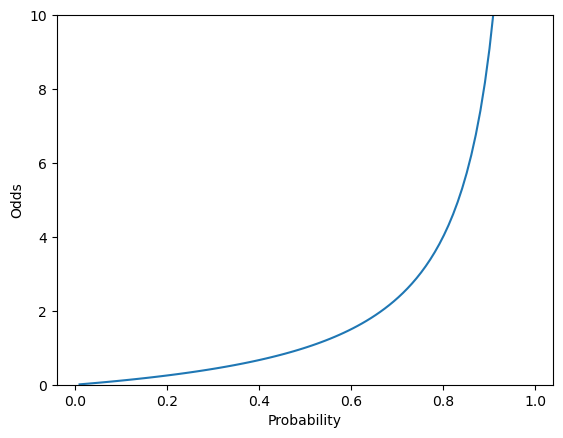

In [24]:
x = np.linspace(0.01, 0.99, 100)
y = x/(1-x)

plt.plot(x,y);
plt.ylabel('Odds');
plt.xlabel('Probability');
plt.ylim(0,10);

Terlihat bahwa hubungan antara peluang $p$ dan _odds_-nya adalah monotonik. Semakin besar nilai peluang $p$, semakin besar nilai _odds_.

> _Range_ nilai _odds_ adalah 0 sampai `+Inf`

### Log of Odds

Sebelumnya kita sudah mengenal _odds_ sebagai perbandingan antara peluang $p$ dan komplemen $q$. _Log of odds_ tidak lain merupakan _odds_ yang ditransformasi dengan fungsi `log()`. Untuk transformasi ini, kita bisa memanfaatkan fungsi `np.log()` dari _package_ `numpy`.

$$
log(odds) = log(\frac{p}{q}) = log(\frac{p}{1-p}) = logit(p)
$$

Misalnya, kita memiliki peluang $p$ = 0.2. Untuk mendapatkan _log_ _of_ _odds_-nya:

In [25]:
# menentukan log of odds untuk peluang p = 0.2

p = 0.2
odds = p/(1-p)
log_odds = np.log(odds)

print(odds)
print(log_odds)

0.25
-1.3862943611198906


Untuk $p$ = 0.2 didapatkan nilai _log of odds_-nya adalah -1.3862943611198906. 

> _Range_ nilai _log of odds_ adalah `-Inf` sampai `+Inf`.

Apabila kita ingin mendapatkan kembali nilai _odds_ dari nilai _log_ _of_ _odds_ tersebut, kita bisa menggunakan fungsi `np.exp()` dari _package_ `numpy`.

In [26]:
# mendapatkan nilai odds dari nilai log of odds = -1.3862943611198906

np.exp(log_odds)

0.25

Untuk mendapatkan nilai peluang dari _log_ _of_ _odds_:

In [27]:
# mendapatkan nilai p dari lof of odds

1/(1 + np.exp(-log_odds))

0.2

**[_Key Points_]**

* Proses transformasi: peluang - _odds_ - _log of odds_.

* Mengubah peluang menjadi _odds_: $$\frac{p}{1-p}$$

* Mengubah _odds_ menjadi _log_ _of_ _odds_: $$log(odds)$$

* Mengubah _log_ _of_ _odds_ menjadi _odds_: $$exp(log(odds))$$

* Mengubah _log_ _of_ _odds_ menjadi peluang : $$ \frac{1}{(1 + e^{(-log \; of \; odds)})}$$

Berikut merupakan plot antara peluang $p$ dengan nilai _log_ _of_ _odds_-nya. 

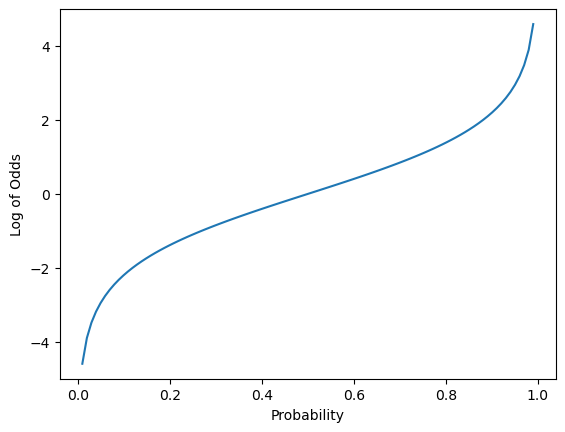

In [28]:
x = np.linspace(0.01, 0.99, 100)
odds = x/(1-x)
y = np.log(odds)

plt.plot(x,y);
plt.ylabel('Log of Odds');
plt.xlabel('Probability');
plt.ylim(-5,5);

Pada plot di atas, kita melihat peluang $p$ pada sumbu $x$ dan _log of odds_ pada sumbu $y$. Sekarang, kita lebih tertarik dengan nilai peluang. Bagaimana jika kita tukar posisi keduanya sehinga _log of odds_ terletak pada sumbu $x$ dan peluang $p$ pada sumbu $y$?

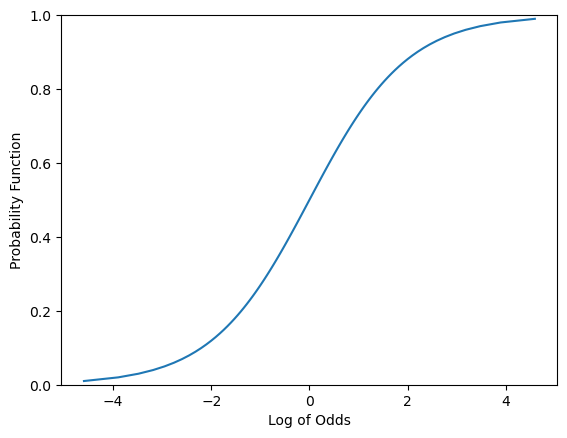

In [29]:
y = np.linspace(0.01, 0.99, 100)
odds = y/(1-y)
x = np.log(odds)

plt.plot(x,y);
plt.ylabel('Probability Function');
plt.xlabel('Log of Odds');
plt.ylim(0,1);

Ternyata kita mendapatkan grafik berbentuk huruf S. Plot di atas tidak lain merupakan plot dari fungsi sigmoid yang digunakan oleh model _logistic regression_ untuk memprediksi peluang. 

$$ Sigmoid(x) = \frac{1}{1+e^{-x}}$$

Peluang inilah yang nantinya akan menjadi patokan apakah data kita termasuk dalam kelas 0 atau 1. Misalnya, dengan menetapkan _threshold_ 0.5, apabila kita memiliki prediksi peluang sebesar 0.8, maka kita mengategorikan bahwa data termasuk ke dalam kelas 1. 

## Logistic Regression from First Principles 

Meskipun namanya mengandung kata "_regression_", _logistic_ _regression_ tidak ditujukan untuk _case_ regresi. _Nature_ dari _logistic_ _regression_ yang melibatkan konsep peluang membuatnya lebih cocok untuk _case_ klasifikasi. Apabila ditinjau lebih lanjut, _logistic regression_ dapat dikatakan sebagai versi spesial dari regresi linear.

_Recall_ kembali bahwa pada regresi linear, kita memprediksi variabel target yang kontinu. Hubungan antara prediktor $x$ dan target $y$ dapat dituliskan sebagai berikut.

$$
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_n \cdot x_n
$$

Keterangan:

* n = banyak prediktor
* $\beta_0$  = _intercept_. _Intercept_ menunjukkan nilai $y$ saat semua prediktornya 0.
* $\beta_1$, $\beta_2$, ..., $\beta_n$ = koefisien prediktor. Koefisien prediktor menunjukkan besarnya kenaikan variabel target saat variabel prediktor naik sebesar 1 satuan dengan catatan nilai semua prediktor lainnya tetap.

Dengan formulasi di atas, maka variabel target $y$ untuk _case_ regresi dapat memiliki nilai pada _range_ `-Inf` sampai `+Inf`.

Apabila kita menggunakan formulasi yang sama untuk memprediksi peluang pada _case_ klasifikasi, maka tidak akan sesuai. Ingat kembali bahwa peluang hanya memiliki _range_ dari 0 sampai 1. Untuk menyiasati hal tersebut, kita perlu menggunakan "representasi lain/transformasi" dari peluang di mana "representasi lain/transformasi" tersebut memiliki nilai pada _range_ `-Inf` sampai `+Inf`. 

Masih ingat dengan _log of odds_ yang kita bahas pada bagian sebelumnya? Kita akan menggunakan _log of odds_ sebagai "representasi lain/transformasi" dari peluang. Dengan demikian, untuk _case_ klasifikasi menggunakan _logistic regression_, formulasi sebelumnya dapat ditulis ulang sebagai berikut: 

$$
log(\frac{p}{1-p}) = logit(p) = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_n \cdot x_n
$$

Untuk mengubah _log of odds_ menjadi peluang yang diinginkan, kita menggunakan fungsi sigmoid yang plot grafiknya sempat kita gambarkan pada bagian sebelumnya.

$$
p(x) = Sigmoid(\beta_0 + \beta_1 \cdot x_1 + ... + \beta_n \cdot x_n)  = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + ... + \beta_n \cdot x_n)}}
$$

**[_Key Points_]**

* Pada _logistic regression_, kita memprediksi _log of odds_ sebagai bentuk lain dari peluang.

* Fungsi sigmoid digunakan untuk _mapping_ _log of odds_ menjadi peluang.

## Logistic Regression in Action

Pada bagian sebelumnya, kita telah mengetahui bahwa:

* _Logistic regression_ mengeluarkan prediksi dalam bentuk _log of odds_.
* Untuk mengubah _log of odds_ menjadi peluang, digunakan fungsi sigmoid.

Pada bagian ini, kita akan melihat bagaimana implementasi _logistic regression_ pada Python menggunakan _package_ `stats.model`. Untuk keperluan ini, kita coba untuk menggabungkan kembali `X_train` dan `y_train` yang sudah kita pisahkan sebelumnya.

In [30]:
# menggabungkan variabel prediktor dan variabel target dalam satu tabel/dataframe

train_data = X_train.copy()
train_data['fraud_bool'] = y_train
train_data = train_data.reset_index().drop(columns = "index")

In [31]:
train_data.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,fraud_bool
0,0.50000,0.58414,-1,354,60,0.02091,22.64003,1342,1097.47353,4135.31093,5993.67415,547,4,142,1,1,1,28,1,200.00000,0,6.25370,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.10000,0.88506,-1,156,20,0.00458,14.54435,597,4891.02002,3214.06166,3144.47120,1,6,223,1,0,1,28,0,990.00000,0,8.95264,1,1,7,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.10000,0.69251,-1,37,20,0.01531,-0.76549,2120,2480.21932,6969.44880,3710.56637,0,7,128,1,1,1,-1,0,200.00000,1,9.67542,1,1,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.90000,0.58853,61,12,40,0.00384,15.55668,268,4593.44153,3050.17974,4256.22243,46,11,108,1,1,1,21,1,500.00000,0,8.50664,0,1,6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.30000,0.81677,-1,209,20,0.00454,-0.74999,1629,1620.07894,2234.76245,3111.30845,12,6,130,1,0,1,1,0,200.00000,0,6.34498,0,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


### Logistic Regression with One Categorical (Discrete) Predictor

Untuk memahami bagaimana _logistic regression_ bekerja, kita akan coba untuk menggunakan satu prediktor kategorikal untuk memprediksi variabel target kita. Untuk pembelajaran pada kasus ini, kita akan menggunakan:

* Prediktor: kolom `has_other_cards`.
* Target: kolom `fraud_bool`.

Dengan satu prediktor, yaitu kolom `has_other_cards`, maka formula untuk prediksi kita dapat ditulis:

$$ logit(p) = \beta_0 + \beta_1 \cdot has_other_cards$$

Kita akan menggunakan fungsi `sm.Logit()` dari _package_ `statsmodel` untuk melakukan _logistic_ _regression_.

In [32]:
train_data['intercept'] = 1

logit_model_tr = sm.Logit(train_data['fraud_bool'], train_data[['intercept','has_other_cards']]).fit()
logit_model_tr.summary()

Optimization terminated successfully.
         Current function value: 0.340175
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraud_bool   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79998
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.02000
Time:                        08:54:48   Log-Likelihood:                -27214.
converged:                       True   LL-Null:                       -27769.
Covariance Type:            nonrobust   LLR p-value:                1.672e-243
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9227      0.012   -161.481      0.000      -1.946      -1.899
has_other_cards    -1.1462      0.039    -29.021      0.000      -1.224      -1.069
===================================================================================
"""

Dengan hasil di atas, formula prediksi kita dapat ditulis ulang:

$$
logit(p) = -1.9227 - 1.1462 \cdot has_other_cards
$$

Mari kita bahas arti dari setiap koefisien yang telah kita dapatkan.

#### Intercept ($\beta_0$)

> _Intercept_ menunjukkan besarnya _log of odds_ saat `has_other_cards = 0`.

> Pada kasus kita maka _log of odds_ yang didapatkan adalah -1.9227.

Untuk mendapatkan _odds_ dan peluang dari _log of odds_:

In [33]:
y_train.value_counts()

fraud_bool
0    71177
1     8823
Name: count, dtype: int64

In [34]:
# mendapatkan odds dan peluang dari log of odds = -1.7615

log_odds = -1.9227
odds = np.exp(log_odds)
p = 1 / (1 + np.exp(-log_odds)) # fungsi sigmoid

print(f'Log of odds akun bank fraud = {round(log_odds, 3)}.')
print(f'Odds akun bank fraud ketika tidak memiliki kartu lain = {round(odds, 3)}.')
print(f'Peluang akun bank fraud ketika tidak memiliki kartu lain = {round(p, 3)}.')

Log of odds akun bank fraud = -1.923.
Odds akun bank fraud ketika tidak memiliki kartu lain = 0.146.
Peluang akun bank fraud ketika tidak memiliki kartu lain = 0.128.


In [35]:
# crosscheck
pd.crosstab(train_data['fraud_bool'], train_data['has_other_cards'])

has_other_cards,0,1
fraud_bool,,
0,55297,15880
1,8085,738


In [36]:
# Peluang akun bank fraud ketika tidak memiliki kartu lain

round(8085/(55297 + 8085), 3)

0.128

> Saat memiliki kartu lain (`has_other_cards = 0`), peluang akun tersebut `Response = 1` adalah sebesar 12.8%.

#### Koefisien `has_other_cards` ($\beta_1$)

> Koefisien `has_other_cards` menunjukkan _log_ dari perbandingan _odds_ akun merupakan fraud ketika tidak memiliki kartu lain dan ketika memiliki kartu lain.

$$
Koefisien_{has_other_cards} = \log(\frac{odd(has_other_cards = 1, fraud_bool = 1)}{odd(has_other_cards = 0,  fraud_bool = 1)})
$$

> Pada kasus kita, _log_ perbandingan _odds_ saat memiliki kartu lain dan saat tidak tidak memiliki kartu lain adalah -1.1462.

Dengan _log_ perbandingan sebesar -1.1462, maka rasio _odds_ yang sebenarnya adalah:

In [37]:
log_ratio = -1.1462
ratio = np.exp(log_ratio)

print(f'Perbandingan odds akun bank fraud jika akun memiliki kartu lain yaitu = {round(ratio, 3)}.')

Perbandingan odds akun bank fraud jika akun memiliki kartu lain yaitu = 0.318.


> Berdasarkan perbandingan _odds_-nya, _odds_ untuk sebuah akun jika memliki kartu lain adalah (`has_other_cards = 1`) 31% lebih rendah daripada odds ketika akun tidak memiliki kartu lain (`has_other_cards = 0`).

Jika kita melihat kembali proporsi antara kolom `fraud_bool` dan `has_other_cards`:

In [38]:
# crosscheck: manual calculation

pd.crosstab(train_data['fraud_bool'], train_data['has_other_cards'])

has_other_cards,0,1
fraud_bool,,
0,55297,15880
1,8085,738


* Untuk `has_other_cards = 0`
    + Peluang `fraud_bool = 0` = $\frac{55297}{(55297 + 8085)}$
    + Peluang `fraud_bool = 1` = $\frac{8085}{(55297 + 8085)}$
* Untuk `has_other_cards = 1`
    + Peluang `fraud_bool = 0` = $\frac{15880}{(15880 + 738)}$
    + Peluang `fraud_bool = 1` = $\frac{738}{(15880 + 738)}$
* Perhitungan _odds_
    + _Odds_ `has_other_cards = 0` mendapatkan `fraud_bool = 1` 
    $$\frac{\frac{8085}{(55297 + 8085)}}{\frac{55297}{(55297 + 8085)}} = \frac{8085}{55297}$$
    + _Odds_ `has_other_cards = 1` mendapatkan `fraud_bool = 1` 
    $$\frac{\frac{738}{(15880 + 738)}}{\frac{15880}{(15880 + 738)}} = \frac{738}{15880} $$
    + Perbandingan _odds_
    $$\frac{\frac{738}{15880}}{\frac{8085}{55297}} = -1.146$$

In [39]:
# koefisien dari Treatment

odd_fraud1_card0 = (8085/55297)
odd_fraud1_card1 = (738/15880)

ratio_card0and1 = odd_fraud1_card0/odd_fraud1_card1

print(f'Rasio odds: {round(ratio_card0and1, 3)}')
print(f'Log rasio odds: {round(np.log(ratio_card0and1),3)}.')

Rasio odds: 3.146
Log rasio odds: 1.146.


Kita berhasil memverifikasi bahwa koefisien dari `has_other_cards` merupakan _log_ dari perbandingan _odds_ apakah akun bank fraud berdasarkan status kepemilikan kartu lain akun tersebut.

### Logistic Regression with One Numerical (Continuous) Predictor

Sekarang, kita akan mencoba untuk menggunakan satu prediktor numerikal, yaitu `credit_risk_score`. Variabel targetnya masih menggunakan kolom `fraud_bool`. Dengan demikian, fungsi untuk melakukan prediksi dapat ditulis:

$$ logit(p) = \beta_0 + \beta_1 \cdot credit_risk_score$$

In [40]:
logit_model_crs = sm.Logit(train_data['fraud_bool'], train_data[['intercept','credit_risk_score']]).fit()
logit_model_crs.summary()

Optimization terminated successfully.
         Current function value: 0.326851
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraud_bool   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79998
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.05838
Time:                        08:54:48   Log-Likelihood:                -26148.
converged:                       True   LL-Null:                       -27769.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -3.4334      0.029   -118.024      0.000      -3.490      -3.376
credit_risk_score     0.0088      0.000     55.977      0.000       0.008       0.009
=====================================================================================
"""

Berdasarkan hasil di atas, kita dapat menulis ulang fungsi prediksi kita menjadi:
    
$$ logit(p) = -3.4334 + 0.0088\cdot credit_risk_score$$

#### Intercept ($\beta_0$)

> _Intercept_ menunjukkan besarnya _log of odds_ saat `credit_risk_score = 0`.

> Pada kasus kita, saat `credit_risk_score = 0`, maka besar _log of odds_ akun bank tersebut fraud adalah -3.4334.

Untuk mendapatkan _odds_ dan peluang dari _log of odds_:

In [41]:
# mendapatkan odds dan peluang dari log of odds = -1.6828

log_odds = -3.4334
odds = np.exp(log_odds)
p = 1 / (1 + np.exp(-log_odds))

print(f'Log of odds akun bank fraud saat `credit_risk_score = 0` = {round(log_odds, 3)}.')
print(f'Odds akun bank fraud saat `credit_risk_score = 0` = {round(odds, 3)}.')
print(f'Peluang akun bank fraud saat `credit_risk_score = 0` = {round(p, 3)}.')

Log of odds akun bank fraud saat `credit_risk_score = 0` = -3.433.
Odds akun bank fraud saat `credit_risk_score = 0` = 0.032.
Peluang akun bank fraud saat `credit_risk_score = 0` = 0.031.


> Saat `credit_risk_score = 0`, peluang akun bank mendapatkan `fraud_bool = 1` adalah sebesar 3.1%.

#### Koefisien `credit_risk_score` ($\beta_1$)

> Koefisien `credit_risk_score` menunjukkan kenaikan _log of odds_ apabila nilai `credit_risk_score` naik sebesar 1 satuan.

> Pada kasus kita, jika nilai `credit_risk_score` naik, maka nilai _log of odds_ akan naik sebesar 0.0088.

Misalnya, nilai awal `credit_risk_score = 50`. Selanjutnya, nilai `credit_risk_score` berubah menjadi 51. Dengan demikian:

In [42]:
# crosscheck

# log of odds saat credit_risk_score = 50
l1 = -3.4334 + 0.0088 * 50

# log of odds saat credit_risk_score = 51
l2 = -3.4334 + 0.0088 * 51

# selisih log of odds
print(f'Selisih log of odds = {round(l2-l1, 4)}.')

Selisih log of odds = 0.0088.


### Logistic Regression with Multiple Predictor

Sejauh ini kita sudah mempelajari bagaimana cara mengartikan suatu koefisien jika prediktornya hanya satu kolom kategorikal saja atau satu kolom numerikal saja. Bagaimana jika kita ingin menggunakan banyak prediktor?

In [43]:
train_data.phone_home_valid.unique()

array([1, 0], dtype=int64)

In [44]:
train_data.head(2)

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,fraud_bool,intercept
0,0.50000,0.58414,-1,354,60,0.02091,22.64003,1342,1097.47353,4135.31093,5993.67415,547,4,142,1,1,1,28,1,200.00000,0,6.25370,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.10000,0.88506,-1,156,20,0.00458,14.54435,597,4891.02002,3214.06166,3144.47120,1,6,223,1,0,1,28,0,990.00000,0,8.95264,1,1,7,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
model_logit_multi = sm.Logit(train_data['fraud_bool'], train_data[['intercept','credit_risk_score','intended_balcon_amount',
                                                                   'has_other_cards', 'phone_home_valid']]).fit()
model_logit_multi.summary()

Optimization terminated successfully.
         Current function value: 0.310968
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraud_bool   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79995
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1041
Time:                        08:54:49   Log-Likelihood:                -24877.
converged:                       True   LL-Null:                       -27769.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -3.0453      0.030   -100.579      0.000      -3.105      -2.986
credit_risk_score          0.0094      0.000     58.248      0.000       0.009       0.010
intended_balcon_amount    -0.0128      0.001    -16.504      0.000      -0.014      -0.011
has_other_cards           -1.2307      0.041    -30.332      0.000      -1.310      -1.151
phone_home_valid          -0.6579      0.026    -24.846      0.000      -0.710      -0.606
==========================================================================================
"""

Dengan _multiple predictor_, fungsi logit untuk prediksi kita dapat ditulis:
    
$$ 
logit(p) = -3.0453 + 0.0094\cdot credit \ risk \ score - 0.0128 \cdot intended \ balcon \ amount \\ - 
1.2307 \cdot has \ other \ cards - 0.6579 \cdot phone \ home \ valid
$$

Cara kita menginterpretasi setiap koefisien masih sama. Hanya saja terdapat sedikit tambahan saat menginterpretasi koefiesien prediktor.

* _Intercept_ menunjukkan _log of odds_ pelanggan membeli produk saat semua prediktor = 0.
* Koefisien prediktor menunjukkan besarnya kenaikan _log of odds_ saat semua prediktor lain nilainya tetap.

Sebagai contoh pada `intended_balcon_amount`:

In [46]:
train_data.intended_balcon_amount.describe()

count   80000.00000
mean        8.05265
std        19.76626
min       -14.06498
25%        -1.18521
50%        -0.84004
75%        -0.19351
max       111.69735
Name: intended_balcon_amount, dtype: float64

In [47]:
crs = 50
balcon0 = 0.48
balcon1 = 1.48
cards = 0
phone = 1

# log of odds awal
l1 = -3.0453 + 0.0094*crs - 0.0128*balcon0 - 1.2307*cards - 0.6579*phone

# log of odds setelah var_2 bertambah 1 unit
l2 = -3.0453 + 0.0094*crs - 0.0128*balcon1 - 1.2307*cards - 0.6579*phone

# selisih
diff = l2-l1

print(f"Selisih log of odds setelah `intended_balcon_amount` naik sebesar 1 unit = {round(diff, 3)}.")

Selisih log of odds setelah `intended_balcon_amount` naik sebesar 1 unit = -0.013.


Jika nilai variabel lain tidak berubah, maka dengan kenaikan `intended_balcon_amount` sebesar 1 unit, maka nilai _log of odds_ akan berkurang sebesar 0.013.

## Prediksi

Ketika kita sudah berhasil membuat model, normalnya kita akan mencoba melakukan prediksi terhadap data *test* yang sudah kita persiapkan pada tahap *train-test-splitting*. Dalam melakukan prediksi, kita bisa memanfaaatkan fungsi `predict()`. Dengan syntax sebagai berikut:

`<nama_model>.predict(<var_prediktor>)`

In [48]:
X_test["intercept"] = 1

pred_credit = model_logit_multi.predict(X_test[['intercept','credit_risk_score','intended_balcon_amount',
                                                'has_other_cards', 'phone_home_valid']])

# ubah hasil prediksi dari peluang ke label
pred_label = pred_credit.apply(lambda x: 1 if x > 0.5 else 0)
pred_label.head()

64955    0
53224    0
31080    0
91843    0
92873    0
dtype: int64

## Evaluasi Model

Untuk mengetahui performa suatu model, kita perlu meninjau hasil prediksi model kita pada data test. Pada kasus ini kita menggunakan satu buah konsep terkait evaluasi kasus klasifikasi yaitu _confusion matrix_.

### Confusion Matrix

Pada _confusion matrix_ langkah awal yang perlu dilakukan adalah menentukan kelas positif. Ketika kita memiliki kasus klasifikasi, kelas positif adalah kelas yang lebih kita fokuskan atau secara sederhana yang ingin kita tinjau lebih dalam.

Pada kode berikut, kita akan meninjau hasil _confusion matrix_ pada model kita:

In [49]:
# buat confusion matrix
pd.crosstab(pred_label, y_test,
            rownames=["predicted label"],
            colnames=["true label"])

true label,0,1
predicted label,,
0,17766,2174
1,28,32


Pada data ini, kita akan berfokus kepada kelas 1 yang merupakan akun bank fraud. Perhatikan pada matrix di atas kita memprediksi data lalu membandingkannya dengan data aslinya yang berkelas 0 dan 1. Setiap pengukuran dari matrix ini sebenarnya memiliki nama, yaitu:

* _True Positive_ (TP): banyaknya label positif yang diprediksi dengan benar (aktual +, prediksi +)
* _True Negative_ (TN): banyaknya label negatif yang diprediksi dengan benar (aktual -, prediksi -)
* _False Positive_ (FP): banyaknya label negatif yang diprediksi dengan salah (aktual -, prediksi +)
* _False Negative_ (FN): banyaknya label negatif yang diprediksi dengan salah (aktual +, prediksi -)

![ ](assets/tnfp.PNG)

Dari keempat pengukuran tersebut, kita dapat menilai evaluasi model berdasarkan 4 metrik berikut:

- **Accuracy**: seberapa tepat model kita memprediksi kelas target (secara global).
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

- **Sensitivity**/ **Recall**: ukuran kebaikan model terhadap kelas `positif`.
$$Recall = \frac{TP}{TP + FN}$$

- Pos Pred Value/**Precision**: seberapa presisi model memprediksi kelas positif.
$$Precision = \frac{TP}{TP + FP}$$
- **Specificity**: ukuran kebaikan model terhadap kelas `negatif` (jarang digunakan karena merupakan kebalikan dari _recall_).

### Accuracy

Kita dapat menghitung nilai akurasi dengan fungsi `accuracy_score()` dari `sklearn`.

In [50]:
accuracy_score(y_test, pred_label)

0.8899

### Precision

Kita dapat menghitung nilai _precision_ dengan fungsi `precision_score()` dari `sklearn`.

In [51]:
precision_score(y_test, pred_label)

0.5333333333333333

### Recall/Sensitivity

Kita dapat menghitung nilai _recall_ dengan fungsi `recall_score()` dari `sklearn`.

In [52]:
recall_score(y_test, pred_label)

0.014505893019038985

### Specificity/True Negative Rate (TNR)

Kita dapat menghitung nilai _specificity_ dengan fungsi `recall_score()`  dan memasukkan parameter `pos_label = 0`.

In [53]:
recall_score(y_test, pred_label, pos_label=0)

0.998426435877262

Secara umum sebenarnya kita dapat menggunakan metrik _accuracy_, tetapi terdapat beberapa kondisi ketika kita harus memilih untuk meninjau **_recall/precision_**:

- _Data imbalance_ (proporsi target variabel tidak seimbang)
- Ada kelas yang lebih penting
- Ada resiko yang perlu dipertimbangkan

Tanpa ketiga syarat di atas, kita bisa dengan mudah meninjau nilai akurasi saja. Tetapi contohnya pada kasus kita sekarang, terdapat kelas yang lebih penting yaitu kelas 1 yang merupakan kondisi akun bank fraud. Ketika kita telah mengetahui kelas positifnya maka kita bisa meninjau resiko apa yang terjadi jika kita melakukan salah prediksi:

- FP: diprediksi fraud ternyata bukan fraud
    - resikonya adalah kehilangan nasabah yang mungkin menggunakan berbagai program bank.
- FN: diprediksi bukan fraud ternyata fraud
    - resikonya adalah kehilangan dana untuk menanggulangi kerugian akibat akun fraud ini.

Berdasarkan penjabaran di atas, kita sendiri yang akan menentukan resiko mana yang sebaiknya kita minimalisir. Apabila kita ingin meminimalisir FP maka kita akan menggunakan metrik **_precision_**, sementara ketika kita ingin meminimalisir FN maka kita akan menggunakan metrik **_recall_**.

## Logistic Regression Key Assumptions

Seperti yang sudah kita pelajari di awal pembahasan mengenai _logistic regression_, _logistic regression_ dapat dipandang sebagai _special case_ dari regresi linear. Jika regresi linear memiliki asumsi yang harus dipenuhi, _logistic_ _regression_ juga memiliki beberapa asumsi:

* **Multikolinearitas**
  + Artinya, setiap prediktor tidak saling berkorelasi tinggi.
* **Obervasi yang Independen**
  + Artinya, setiap observasi tidak berasal dari pengukuran yang berulang dan harus independen satu sama lain.
* **Linearitas antara Prediktor dan _Log of Odds_**
  + Artinya, terdapat hubungan linear antara prediktor dan _log of odds_.

# Model Classification 2 - K-Nearest Neighbour

Algoritma K-Nearest Neighbor merupakan metode yang menggunakan informasi `k` tetangga terdekat untuk mengklasifikasi data tanpa label. Ketika dilatih, model ini akan mempelajari informasi lokasi suatu data dan label data tersebut. Informasi lokasi dan label ini yang akan menjadi acuan ketika data tanpa label diidentifikasi. Dari jumlah tetangga terdekat suatu data tanpa label, kelas dominan yang akan dipilih sebagai kelas data tersebut.

Kita akan menggunakan contoh gambar di bawah sebagai ilustrasi. Anggaplah kita memilih nilai k = 1 maka tanda * akan menghitung lokasi ke setiap titik di sekitarnya dan mengambil 1 tetangga paling dekat sebagai kelas dirinya. Pada kasus ini artinya dia akan diklasifikasikan sebagai kelas kotak. 

![](assets/knn.jpg)

Tetapi apabila kita memilih k = 5, maka kelas dominan dari lima poin di sekitar tanda * ini adalah tanda bulat. Secara lebih jelasnya, berikut adalah proses pengambilan keputusan oleh k-NN.

![](assets/KNN.png)

## Euclidean Distance

Metode k-NN ini menggunakan perhitungan jarak yang disebut *Euclidean distance* yaitu menghitung jarak paling dekat (seperti menggunakan penggaris untuk menghubungkan dua titik). 
Apabila kita memiliki dua buah data bernama A dan B dengan fitur seperti berikut:

A = ($x_1, x_2, …, x_m$)

B = ($y_1, y_2, …, y_m$)

Pada keterangan di atas, _m_ merupakan dimensi fitur data kita. Untuk melakukan perhitungan jarak antara A dan B, formula _Euclidean distance_ yang digunakan yaitu:

$$dist(A,B) = \sqrt{\sum\limits^{m}_{i=1}(x_i-y_i)^2}$$

Jika kita aplikasikan formula di atas pada contoh _blind-tasting_ suatu makanan, kita dapat menghitung jarak antara kedua makanan di bawah dengan fiturnya masing-masing sebagai berikut:

- tomato (sweet: 6, crunchy: 4)  
- green bean (sweet: 3, crunchy: 7)

dist(tomato, green bean) = `sqrt((6-3)^2 + (4-7)^2))` yang menghasilkan angka 4.24.

## Data Preparation

Pada kasus ini kita akan kembali menggunakan data credit kita sebelumnya. Pada metode k-NN karena kita memperhitungkan nilai berdasarkan jarak maka kita tidak akan menggunakan data kategorikal sama sekali. Mari kita lihat kembali data kita lalu kita ambil data numeriknya saja.

In [54]:
credit_knn = credit.select_dtypes("number")
credit_knn.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0,0.90000,0.61579,-1,51,40,0.01034,-0.69955,2659,11007.70883,7448.79742,5576.30356,2030,7,253,1,1,1,9,1,1500.00000,0,13.07981,0,1,1
1,0,0.60000,0.07246,-1,125,20,0.00697,-0.95947,5599,6304.26284,4373.09359,4721.10002,1,13,112,1,1,0,-1,0,200.00000,0,6.66655,0,1,4
2,1,0.50000,0.07659,-1,37,50,0.00632,-1.21993,1352,1357.41355,6667.02966,6318.87626,15,6,199,1,1,1,28,0,1500.00000,0,4.49267,1,2,0


Mari kita lanjutkan proses pembuatan model ini dengan membagi data kita menjadi data train dan data test.

In [55]:
y = credit_knn["fraud_bool"]
X = credit_knn.drop(columns=["fraud_bool"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Features rescaling

Jika kita lihat di atas, data kita tersusun dari berbagai data dengan _range_ nilai yang berbeda-beda. Hal ini akan menjadi masalah ketika kita menggunakan metode k-NN yang menghitung nilai berdasarkan jarak. Variabel dengan nilai di antara 1 sampai 500 akan jauh lebih signifikan dibanding variabel dengan nilai 0 sampai 1. 

Kondisi ini dapat diselesaikan dengan melakukan _rescaling_ keseluruhan variabel kita. Dengan _rescaling_ kita dapat memampatkan atau melebarkan nilai data menjadi _range_ yang kurang lebih sama. Beberapa metode scaling yang biasa digunakan yaitu:

- Mix-Max normalization  
- z-score standardization

#### Min-max normalization

Metode ini bekerja dengan melakukan transformasi nilai data agar berada di jarak 0 sampai 1. Formula yang digunakan:

$$x_{new}=\frac{(x-min(x))}{(max(x)-min(x))}$$

#### z-score standardization

Metode ini bekerja dengan melakukan transformasi berdasarkan informasi mean dan standar deviasi dari data. Formula yang digunakan:

$$x_{new}=\frac{(x-\bar x)}{std(x)}$$

Metode z-score ini akan menghasilkan nilai dalam skala z-score yang tidak memiliki batas maksimum atau minimum dan dapat bernilai negatif maupun positif. 

Pada kasus ini, kita akan menggunakan metode z-score pada data kita. Metode ini dapat diakses menggunakan fungsi `StandardScaler()` dari `sklearn.preprocessing`.

Kita akan mempelajari informasi dari data train dan scaling pada data test akan dilakukan berdasarkan informasi data train untuk mencegah _data leaking_.

In [56]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## Modeling

### Choosing an appropriate *k*

Penentuan berapa tetangga yang diperhitungkan oleh k-NN akan berdampak kepada seberapa mampu model men-generalisasi data. Keseimbangan antara overfitting dan underfitting data training umumnya dikenal sebagai **bias-variance tradeoff**. Penggunaan nilai k yang besar mengurangi pengaruh variasi pada _noisy data_, tetapi dapat membuat pembelajaran model menjadi bias yang membuat model menghindari pola penting yang ditangkap dari informasi kecil/detail.

Jika kita menggunakan nilai k yang sangat besar, seperti sejumlah observasi pada data training kita. Hal ini akan menyebabkan model selalu memprediksi kelas dominan. Sebaliknya, jika kita menggunakan nilai k = 1 menyebabkan data outliers berpengaruh tidak semestinya terhadap klasifikasi. Jika salah satu data training secara tidak sengaja salah dilabeli dan terdapat satu data yang tepat di sebelahnya, pemilihan k = 1 akan menyebabkan misklasifikasi walaupun 10 data tetangga lain memberi vote kelas lain.


Pada prakteknya, salah satu strategi untuk menentukan nilai k yaitu dengan **menghitung akar kuadrat dari jumlah data training**. Strategi lain adalah menggunakan nilai k yang lebih besar tetapi memperhitungkan bobot berdasarkan jarak antar data. Jarak data yang lebih dekat berbobot lebih tinggi dibanding jarak data yang lebih jauh.

Selain itu pembulatan dari perhitungan akar kuadrat ini disesuaikan dengan beberapa syarat lain yaitu:

- k harus ganjil bila jumlah kelas target genap
- k harus genap bila jumlah kelas target ganjil 
- k tidak boleh angka kelipatan jumlah kelas target

Hal ini dilakukan untuk menghindari seri ketika proses majority voting dilakukan. Apabila hasil majority voting ini seri maka kelas akan dipilih secara random. Mari kita hitung nilai k pada kasus kita sebelum membuat model.

In [57]:
np.sqrt(X_train.shape[0])

282.842712474619

Berdasarkan perhitungan di atas maka kita akan menggunakan nilai `k = 283`.

In [58]:
model_knn = KNeighborsClassifier(n_neighbors = 283)
model_knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=283)

### Characteristics of k-NN

Metode klasifikasi menggunakan k-NN biasa disebut sebagai '_lazy learners_' karena kita tidak benar-benar membuat model. Pada proses k-NN tidak terjadi proses generalisasi seperti pada model logistic regression. Secara teknikal dapat dikatakan bahwa k-NN hanya menghafal lokasi data tidak benar-benar mempelajari datanya.

Mari kita simpulkan proses yang perlu dilakukan k-NN hingga mendapatkan prediksi:

- Scaling (transformasi variabel agar berada pada _range_ nilai yang kurang lebih sama agar tidak ada yang lebih dominan)
- Memilih nilai k
- Membuat model (memilih k tetangga terdekat untuk setiap sampel uji)
- Melakukan klasifikasi berdasarkan kelas dominannya

Karena berbagai alasan di atas, maka secara komputasi proses ini cukup berat apabila kita memiliki data dengan dimensi yang besar (membutuhkan memori yang besar karena melakukan perhitungan jarak secara berulang). Jika kita memilih k yang kecil, metode ini akan sensitif terhadap _noise_ di data kita.

Meskipun terdapat berbagai limitasi, k-NN sangatlah _powerful_ dan _versatile_. Beberapa kelemahan seperti kondisi outlier dapat diselesaikan dengan scaling yang sudah dipelajari. k-NN juga akan menjadi tidak sensitif terhadap outlier dan noise apabila kita memilih nilai k dengan tepat. Selain itu k-NN mampu bekerja baik pada data non-linear tidak seperti metode logistic regression.

## Prediction

Mari kita kembali ke model kita dan coba melakukan prediksi pada data test kita.

In [59]:
knn_pred = model_knn.predict(X_test_scale)

## Evaluation

Seperti model sebelumnya, kita tetap harus meninjau performa model pada data test agar kita dapat menentukan apakah model ini dapat digunakan atau tidak. Mari kita lihat confusion matrix model kita pada data test.

In [60]:
pd.crosstab(knn_pred, y_test,
            rownames=["predicted label"],
            colnames=["true label"])

true label,0,1
predicted label,,
0,17750,2065
1,44,141


Mari kita juga tinjau ketiga metrik evaluasi yaitu akurasi, recall, dan precision.

In [61]:
print("Akurasi: ", accuracy_score(y_test, knn_pred))
print("Recall: ", recall_score(y_test, knn_pred, pos_label=1))
print("Precision: ", precision_score(y_test, knn_pred, pos_label=1))

Akurasi:  0.89455
Recall:  0.06391659111514053
Precision:  0.7621621621621621


# Modeling Summary

Secara kesimpulan, sebenarnya kedua model yang telah kita buat belum baik karena metriks utama kita (recall) masih menghasilkan nilai yang sangat kecil. Artinya kita masih perlu melakukan eksplorasi terkait penanganan data maupun tuning model. Hal ini utamanya karena pada kasus ini kita berhadapan dengan data yang imbalance.

Seperti yang telah disebutkan sebelumnya, terdapat metode seperti oversampling dan undersampling yang mampu mengubah komposisi data kita. Selain itu kita juga dapat melakukan pemilihan fitur yang digunakan pada model, melakukan _hyperparameter tuning_, dsb.

Berbagai metode di atas tidak akan dibahas di kelas ini dan dapat dieksplorasi mandiri di luar kelas.

## [Additional] Classification Model Selection: Overfit, Underfit, Just Right

Pada bagian ini kita akan membahas istilah _overfitting_ yang mengacu pada kondisi di mana model terlalu mempelajari pola pada data sehingga gagal memprediksi data baru. Perhatikan gambar di bawah ini!

![](assets/underfitting_overfitting.png)

### Overfitting (High Variance)

Seperti yang sudah kita ketahui, bahwa _overfitting_ merupakan kondisi di mana model sangat menghafal pola pada data _training_. Bayangkan bahwa data training memiliki _signal_/pola dan _noise_. 

> Idealnya, kita hanya menginginkan model hanya mempelajari _signal_/pola.

Yang terjadi pada _overfitting_, model juga mempelajari _noise_ pada data. Akibatnya, jika diberikan data baru, model gagal melakukan prediksi (gagal melakukan generalisasi). 

Gejala _overfitting_ dapat diketahui dari hal-hal berikut.

1. Model menunjukkan performa yang baik pada data _training_ (tingkat _error_ kecil).
2. Model menunjukkan performa yang rendah pada data _testing_ (tingkat _error_ besar). Perbedaan performa antara _training_ dan _testing_ sangat besar.

Penyebab _overfitting_:

1. Ukuran untuk data _training_ sangat kecil dan tidak representatif.
2. Data yang digunakan untuk _training_ banyak mengandung _noise_.
3. Prediktor yang digunakan pada data _training_ tidak sesuai.
4. Model yang terlalu kompleks.

Cara mengatasi _overfitting_ yang dapat dilakukan:

1. _Adjustment_ dari segi model:
   +  Menggunakan model yang lebih sederhana.
   +  Melakukan _fine-tuning_ model: 
      - Melakukan _pruning_/_regularization_.
      - Melakukan _hyperparameter_ _search_.
2. _Adjustment_ dari segi data:
   +  Menambah data yang digunakan untuk proses _training_.
   +  Melakukan _feature_ _selection_.
   +  Melakukan _handling_ untuk _imbalance_ _dataset_.
3. _Adjustment_ dari cara _training_:
   +  Melakukan _cross_ _validation_.
   
### Underfitting/High Bias

Berkebalikan dengan _overfitting_, pada _underfitting_, model tidak dapat mendeteksi pola pada data. Akibatnya, model gagal untuk memprediksi data baru.

Gejala _underfitting_ dapat diketahui dari hal berikut.

1. Model menunjukkan performa yang rendah pada data _training_ (tingkat _error_ besar).
2. Model menunjukkan performa yang rendah pada data _testing_ (tingkat _error_ besar). Perbedaan performa antara _training_ dan _testing_ tidak terlalu jauh.

Penyebab _underfitting_:

1. Ukuran untuk data _training_ sangat kecil dan tidak representatif.
2. Prediktor yang digunakan pada data _training_ tidak sesuai.
3. Model yang terlalu sederhana.

Cara mengatasi _underfitting_ yang dapat dilakukan:

1. _Adjustment_ dari segi model:
   +  Menggunakan model yang lebih kompleks.
   +  Melakukan _fine-tuning_ model.
2. _Adjustment_ dari segi data:
   +  Menambah data yang digunakan untuk proses _training_.
   +  Mencoba mengganti prediktor yang dimasukkan ke data _training_ (_feature selection_).
3. Adjustment dari cara _training_:
   +  Melakukan _cross validation_.
   
### Trade-Off Underfitting and Overfitting (Bias and Variance Trade-Off)

![](assets/bias_variance_tradeoff.jpg)

_Challenge_ utama saat membangun _machine_ _learning_ adalah menghasilkan model yang merupakan perpotongan dari _underfitting_ dan _overfitting_. Artinya, kita ingin membangun model yang tidak terlalu kompleks (tidak _overfit_), tetapi bisa menghasilkan prediksi dengan benar (tidak _underfit_).

> Model ideal saat melakukan _machine_ _learning_: memiliki _variance_ dan bias yang rendah (tingkat _overfitting_ dan _underfitting_ rendah).

# Wrap Up

Pada _course_ ini, kita sudah mempelajari banyak hal untuk membuat _machine_ _learning_. Apabila dirunut kembali, apa yang sudah kita lakukan sejauh ini sebenarnya mengikuti _workflow machine learning_ secara umum:

![](assets/ml_workflow.jpg)

1. Mendapatkan data
2. Persiapan data: cek tipe data, cek _missing values_, _feature selection_, _target and predictors splitting_, _one-hot encoding_, _cross validation_, _sampling_, dll.
3. _Modeling_: membuat dan melatih model _machine learning_.
4. Evaluasi performa model: menggunakan _metrics evaluation_.

Proses ini biasanya tidak berjalan satu arah. Terkadang kita sering harus kembali ke _step_ sebelumnya. Dalam hal ini, dari _step_ 4, kadang kita bisa mengulang lagi dari _step_ 2 atau bahkan _step_ 1.

> Proses _machine learning_ sering kali melibatkan serangkaian percobaan dan kesalahan. Pendekatan yang digunakan dalam menyelesaikan suatu masalah tertentu tidak selalu dapat diterapkan secara langsung untuk menyelesaikan masalah lain yang berbeda.